# Visualizing Outer Branches of the Distribution

## General

### Imports

In [ ]:
import pyvdirs.dirs as dirs
import sys
import os
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

import copy
import pickle
import builtins
import numpy as np
import torch
import matplotlib.pyplot as plt
import pyvtools.text as vtext

import ToyExample.toy_example as toy

%load_ext autoreload
%autoreload 2

### Parameters

In [2]:
# Network parameters
net_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "10_EarlyStopACID_InvertedGuideACID_iter4096learner.pkl")
ema_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "10_EarlyStopACID_InvertedGuideACID_iter4096.pkl")
classes='A'
num_layers=4
hidden_dim=64
batch_size=4<<10
total_iter=4<<10

# Distribution parameters
P_mean=-2.3
P_std=1.5
sigma_data=0.5
sigma_max=5
lr_ref=1e-2
lr_iter=512
ema_std=0.010

# Guidance parameters
guidance=False
guidance_weight=3
guide_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "10_EarlyStopACID_Ref_iter0512.pkl")
guide_interpolation=False

# ACID parameters
acid=False
acid_n=16
acid_f=0.8
acid_diff=True
acid_inverted=False

# Training parameters
val_batch_size=4<<7
test_batch_size=4<<8

# Other parameters
device=torch.device('cuda')
fig1_kwargs = dict(view_x=0.30, view_y=0.30, view_size=1.2, device=device)
fig2_kwargs = dict(view_x=0.45, view_y=1.22, view_size=0.3, device=device)#, sample_distance=0.045, sigma_max=0.03)
seed=0

In [3]:
# Set random seed, if specified
if seed is not None:
    print("Seed = ", seed)
    torch.manual_seed(seed)
    generator = torch.Generator(device).manual_seed(seed)
    np.random.seed(seed)

Seed =  0


In [8]:
# Initialize models
if net_path is not None:
    with builtins.open(net_path, "rb") as f:
        net = pickle.load(f).to(device)
    print("Model has been loaded")
else:
    net = toy.ToyModel(num_layers=num_layers, hidden_dim=hidden_dim, sigma_data=sigma_data).to(device).train().requires_grad_(True)
if ema_path is not None:
    with builtins.open(ema_path, "rb") as f:
        ema = pickle.load(f).to(device)
    print("EMA has been loaded")
else:
    ema = copy.deepcopy(net).eval().requires_grad_(False)
if guide_path is not None:
    with builtins.open(guide_path, "rb") as f:
        guide = pickle.load(f).to(device)
    print("Guide has been loaded")
else:
    guide = None
if guidance and acid:
    ref = guide
    print("Guide assigned as ACID reference")
elif acid: 
    ref = ema
    print("EMA assigned as ACID reference")
else: ref = None

Model has been loaded
EMA has been loaded
Guide has been loaded


## Plots

### Original plots

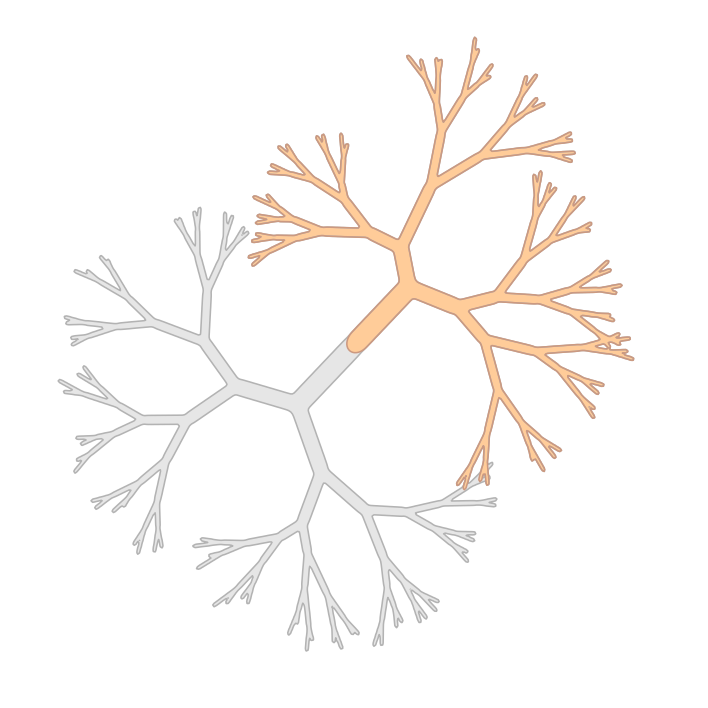

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'gt_uncond', 'gt_outline'}, device=device, ax=ax)

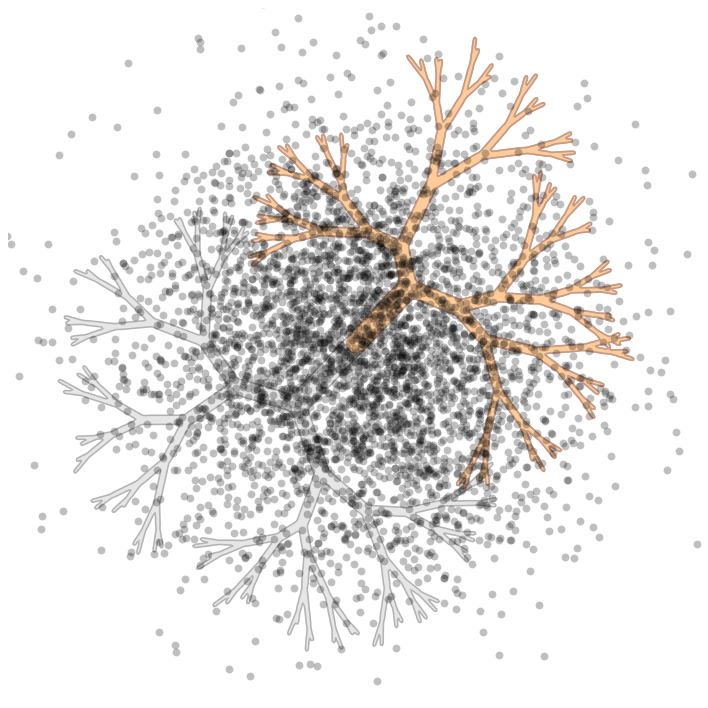

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples','gt_uncond', 'gt_outline'}, 
            sigma_max=sigma_max, device=device, num_samples=1<<12, ax=ax)

Text(0.5, 1.0, 'Sigma max = 0.5')

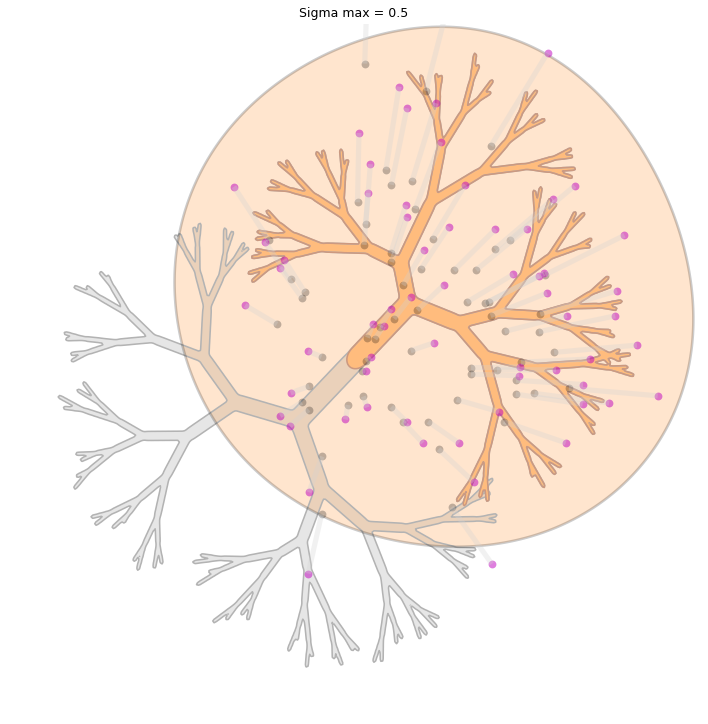

In [ ]:
sigma_max = 0.5
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples_before_small',
                        'trajectories_small', 'samples',
                        'gt_smax',
                        'gt_uncond', 'gt_outline'}, 
            num_samples=1<<6, sigma_max=sigma_max, ax=ax)
plt.title(f"Sigma max = {sigma_max:.1f}")

### Outer distribution plots

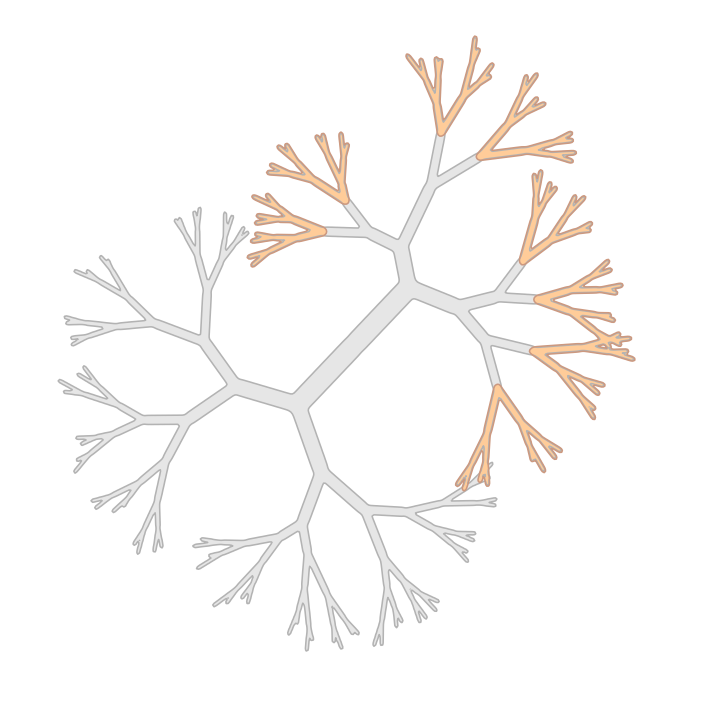

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'gt_uncond', 'out_gt_outline'}, device=device, depth_sep=4, ax=ax)

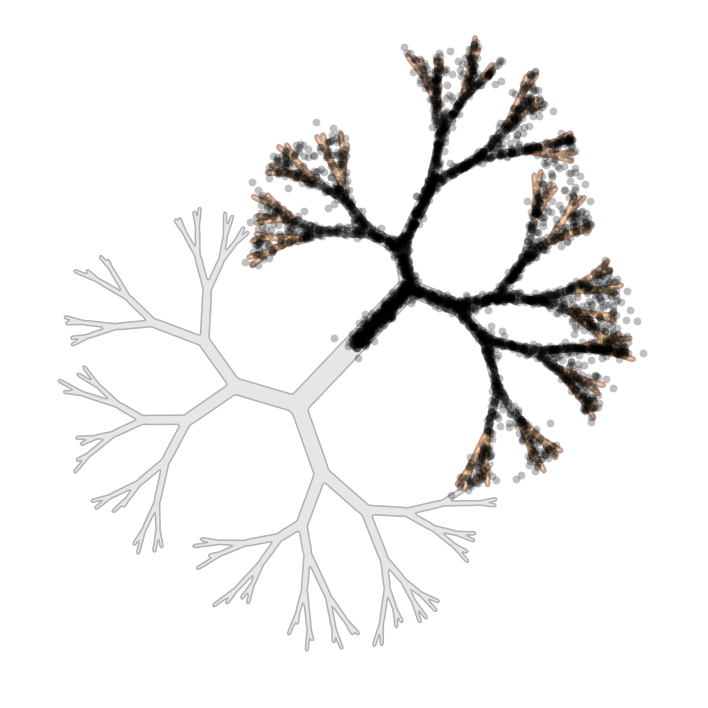

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'out_samples','gt_uncond', 'out_gt_outline'}, 
            sigma_max=sigma_max, device=device, num_samples=1<<12, ax=ax)

Text(0.5, 1.0, 'Sigma max = 0.5')

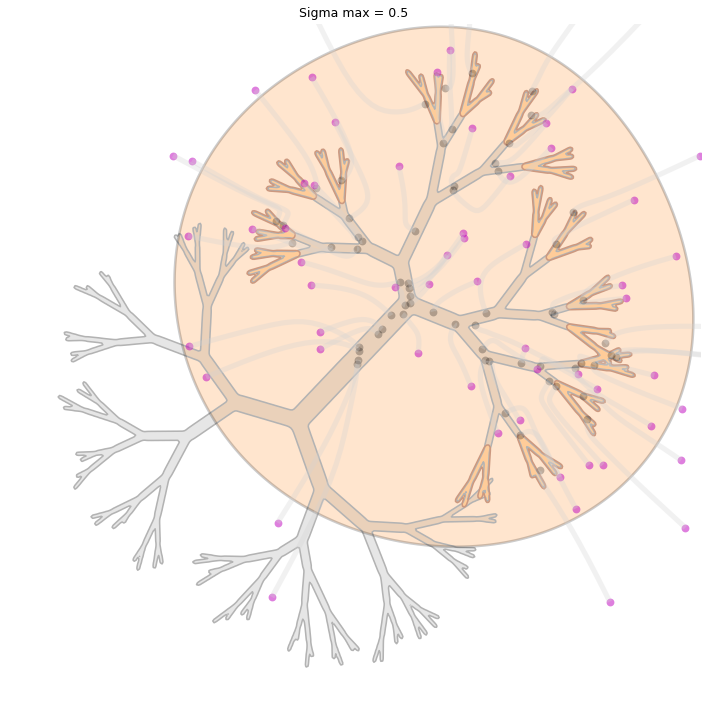

In [ ]:
sigma_max = 0.5
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'out_samples_before_small',
                        'out_trajectories_small', 'out_samples',
                        'gt_smax',
                        'gt_uncond', 'out_gt_outline'},
            num_samples=1<<6, sigma_max=sigma_max, ax=ax)
plt.title(f"Sigma max = {sigma_max:.1f}")

Text(0.5, 1.0, 'Sigma max = 0.5 & Depth Sep = 5')

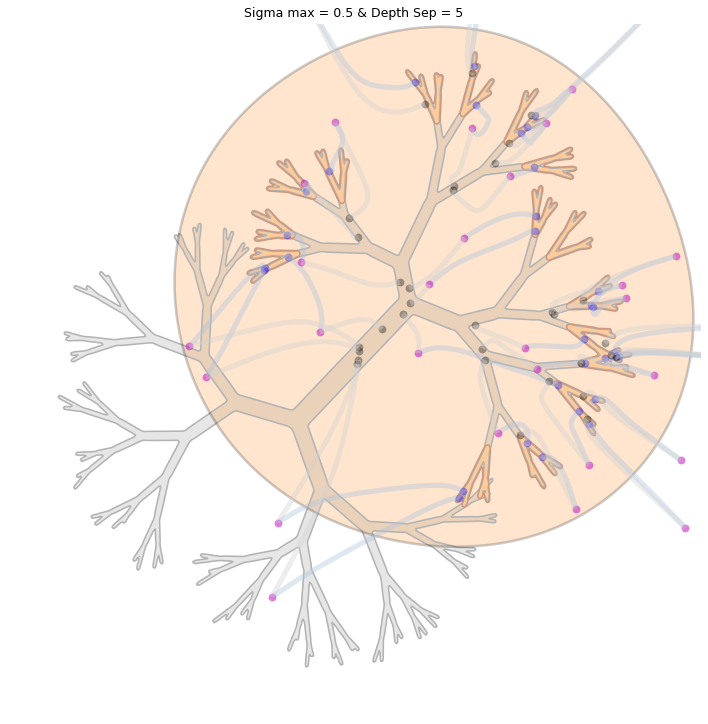

In [ ]:
depth_sep = 5
sigma_max = 0.5
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'out_samples_before_small',
                        'out_trajectories_small', 'out_samples', 
                        'out_gt_after', 'out_gt_trajectories_small',
                        'gt_smax',
                        'gt_uncond', 'out_gt_outline'}, 
            num_samples=1<<5, sigma_max=sigma_max, depth_sep=depth_sep, ax=ax)
plt.title(f"Sigma max = {sigma_max:.1f} & Depth Sep = {depth_sep:.0f}")

Text(0.5, 1.0, 'Guidance & Sigma max = 0.5 & Depth Sep = 5')

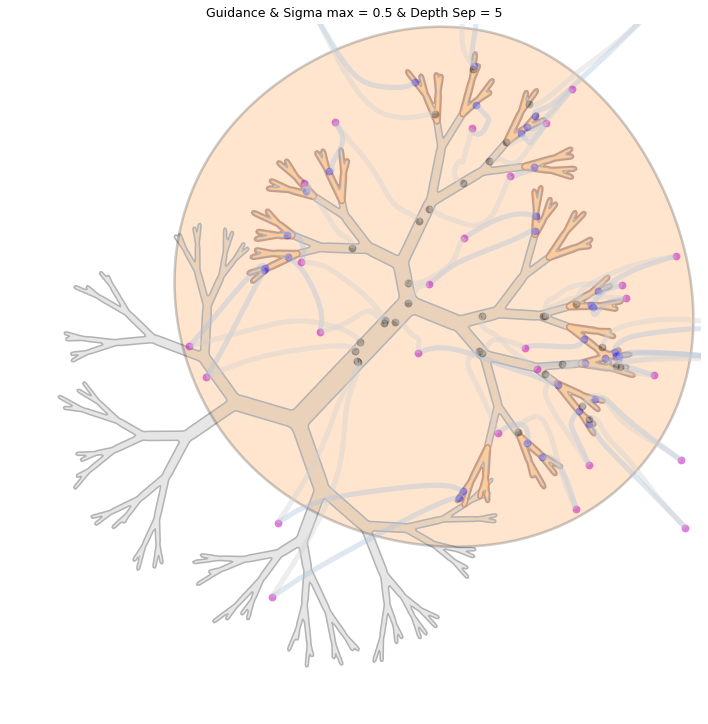

In [ ]:
depth_sep = 5
sigma_max = 0.5
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'out_samples_before_small',
                        'out_trajectories_small', 'out_samples', 
                        'out_gt_after', 'out_gt_trajectories_small',
                        'gt_smax',
                        'gt_uncond', 'out_gt_outline'}, num_samples=1<<5, sigma_max=sigma_max,
            depth_sep=depth_sep, gnet=guide, guidance=guidance_weight, ax=ax)
plt.title(f"Guidance & Sigma max = {sigma_max:.1f} & Depth Sep = {depth_sep:.0f}")